# **DS322 - Machine Learning**
### Instructor:  Mr. Matthew R. Maulion, MSc

#### Names of Group 3 Members:
- Cagas, Nephea
- Galinato, Jan Carlo
- Opalla, Erica
- Velono, Hannah
- Viudor, Janrey

#### Section: DS3A

# **Shine Bright Like a Diamond** ✨💎
### Mining Data Gems for Diamond Pricing Insights Using kNN Regression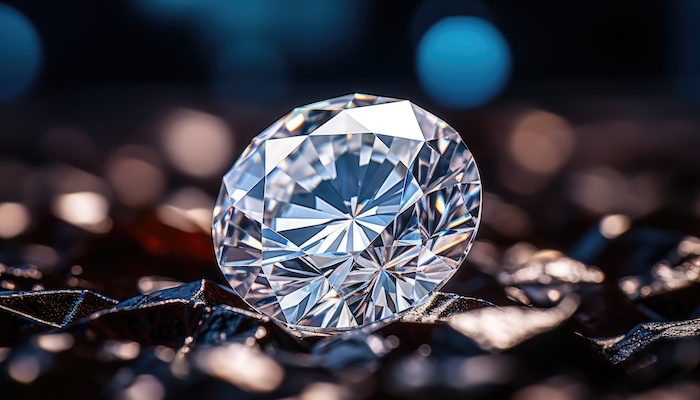

# **Data Discussion**

### **Diamonds**

The diamond dataset is a collection of data describing approximately 54,000 diamonds. It provides detailed information about various attributes of each diamond, making it a valuable resource for understanding the factors that contribute to diamond pricing and quality assessment. The data source is in Kaggle, specifically available at: https://www.kaggle.com/datasets/shivam2503/diamonds/data

Attribute Information:
 - **Price (Target):** The price of the diamond in US dollars
 - **Carat:** The weight of the diamond, ranging from 0.2 to 5.01 carats.
 - **Cut:** The quality of the diamond's cut, categorized as Fair, Good, Very Good, Premium, or Ideal.
 - **Color:** The color of the diamond, ranging from J (worst) to D (best).
 - **Clarity:** A measurement of how clear the diamond is, categorized from I1 (worst) with intermediate levels such as SI2, SI1, VS2, VS1, VVS2, and VVS1, and IF (best),
 - **X:** The length of the diamond in millimeters, ranging from 0 to 10.74 mm.
 - **Y:** The width of the diamond in millimeters, ranging from 0 to 58.9 mm.
 - **Z:** The depth of the diamond in millimeters, ranging from 0 to 31.8 mm.
 - **Depth:** The total depth percentage of the diamond, calculated as z / mean(x, y) or 2 * z / (x + y), ranging from 43 to 79.
 - **Table:** The width of the top of the diamond relative to its widest point, ranging from 43 to 95.





### Import Libraries | Load Dataset

In [ ]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 6.4 MB/s eta 0:00:00


In [ ]:
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error


%matplotlib inline

url = 'https://raw.githubusercontent.com/NephCgs/jnotebook/main/diamonds.csv'
df = pd.read_csv(url)
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


### Data Pre-processing | Exploratory Data Analysis

In [ ]:
df.shape

(53940, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

No null values

In [ ]:
#rename columns, x,y,z and depth
df.rename(columns={'depth': 'total depth percentage', 'x': 'length in mm', 'y': 'width in mm', 'z': 'depth in mm'}, inplace=True)
df

,Unnamed: 0,carat,cut,color,clarity,total depth percentage,table,price,length in mm,width in mm,depth in mm
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
# drop unamed:0 column
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,carat,cut,color,clarity,total depth percentage,table,price,length in mm,width in mm,depth in mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
object_dict = {
    'cut': {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5},
    'clarity': {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8},
    'color': {'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1}
}

# Use replace function to map categorical values to numerical values
df.replace(object_dict, inplace=True)

In [ ]:
df.describe()

,carat,cut,color,clarity,total depth percentage,table,price,length in mm,width in mm,depth in mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


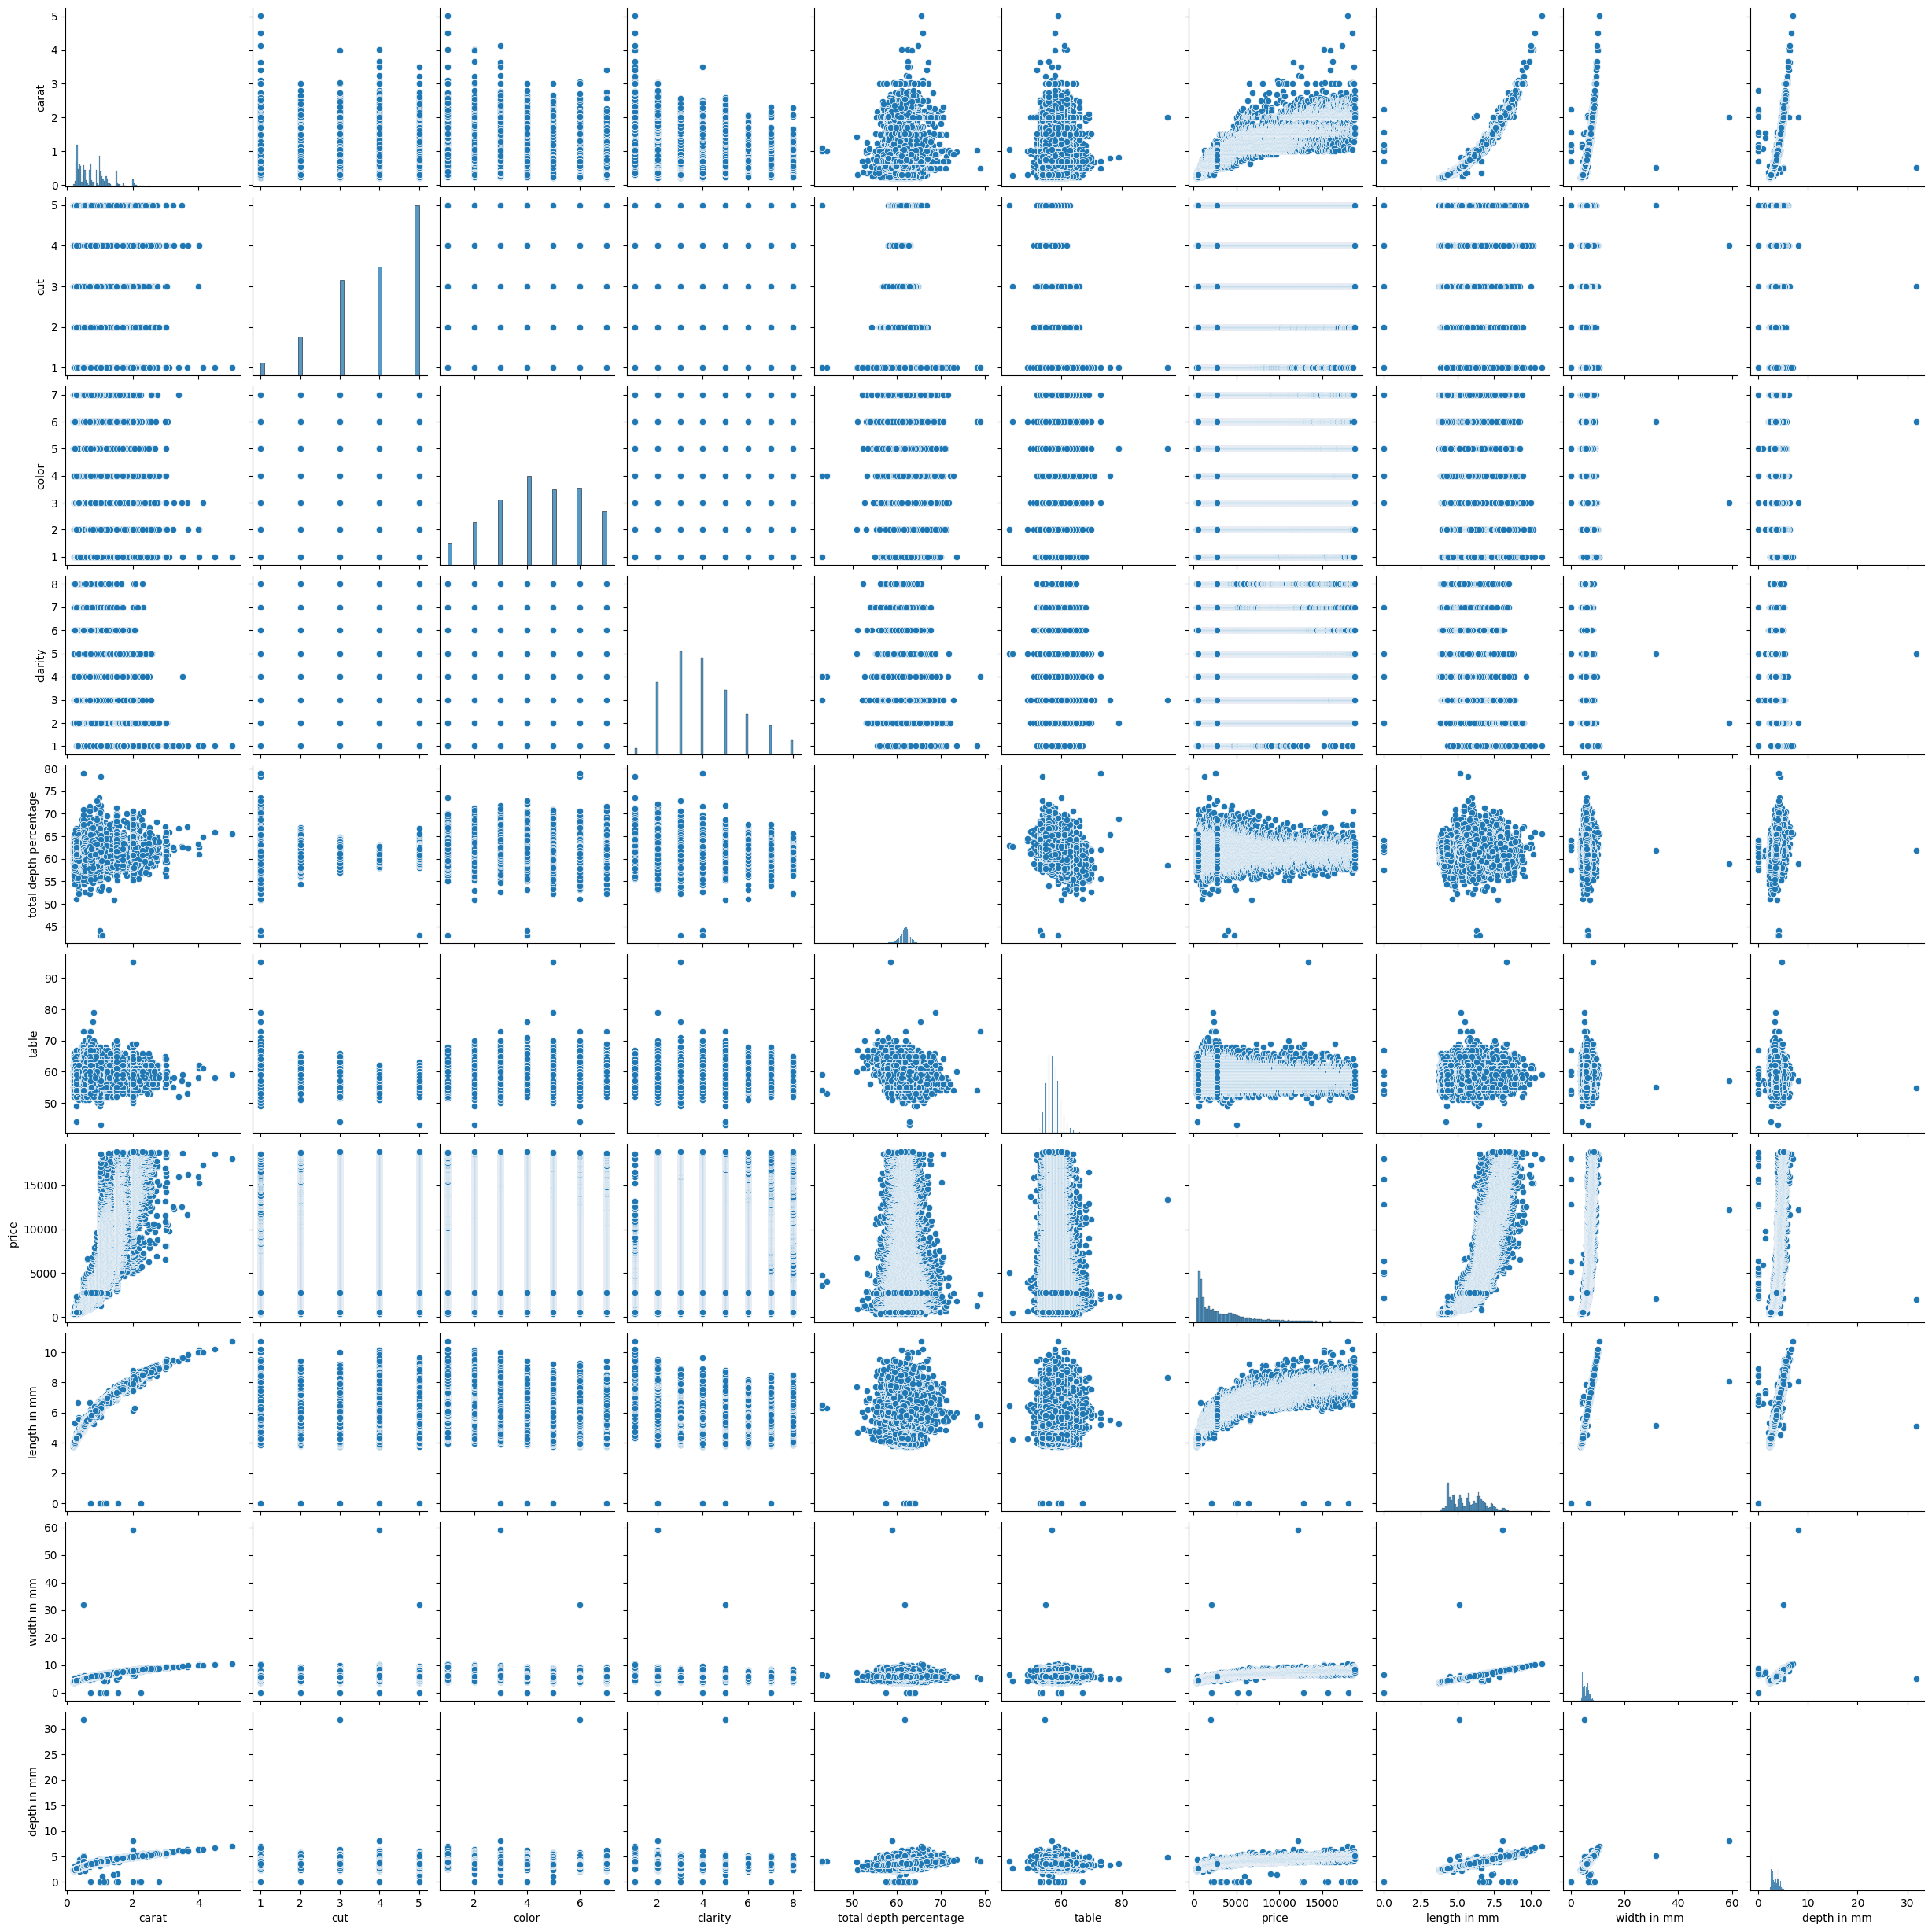

In [ ]:
sns.pairplot(df)
plt.show()

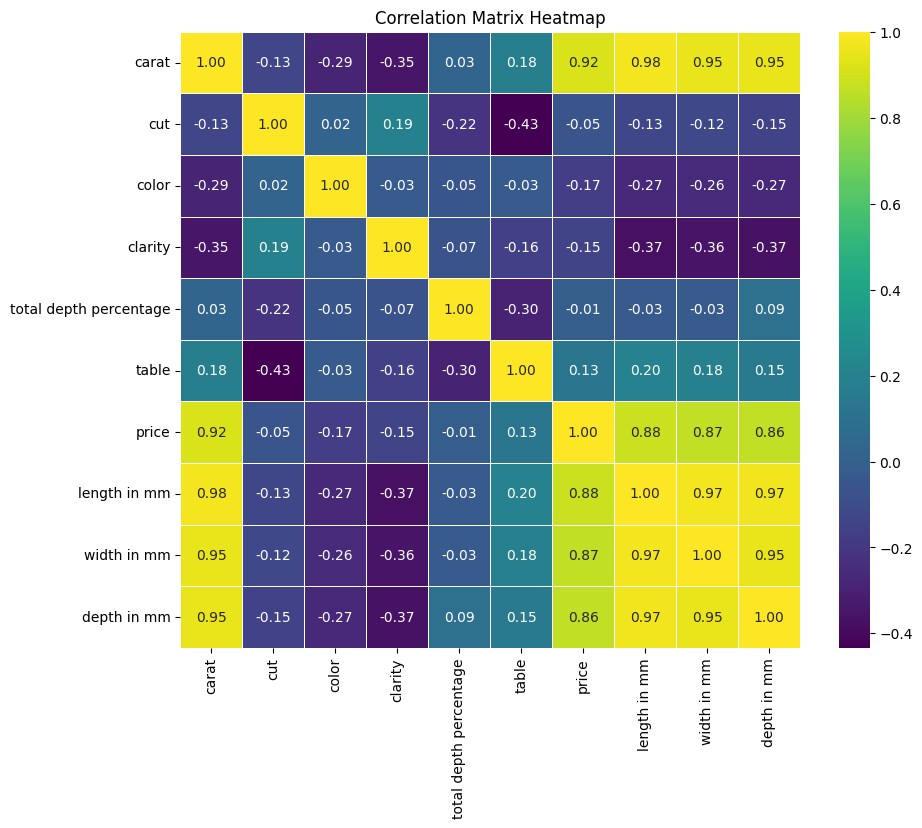

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


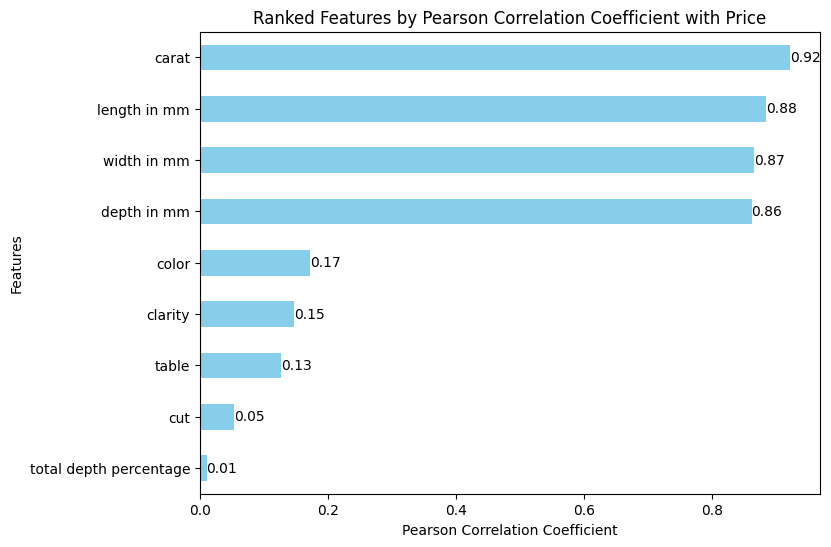

In [ ]:
Ranked_features = corr_matrix['price'].abs().sort_values(ascending=False)[1:10]

# Plotting
plt.figure(figsize=(8, 6))
Ranked_features.plot(kind='barh', color='skyblue')
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.title('Ranked Features by Pearson Correlation Coefficient with Price')

# Adding the corresponding correlation coefficient values to the plot
for index, value in enumerate(Ranked_features):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display highest correlation at the top
plt.show()

**Top three recommendations:**

 - **Consider Carat Weight Carefully:** Carat weight has a strong positive correlation with price, indicating that larger diamonds tend to have higher prices. When purchasing diamonds, consider the carat weight carefully based on budget and personal preferences. It's essential to strike a balance between size and other quality factors to ensure value for money.

 - **Pay Attention to Cut Quality:** The cut quality of a diamond shows a moderate negative correlation with price. This suggests that diamonds with higher cut grades may have lower prices compared to diamonds with lower cut grades. However, cut quality significantly influences a diamond's brilliance and sparkle. Therefore, prioritize diamonds with excellent or ideal cut grades for optimal visual appeal.

 - **Evaluate Color and Clarity:** While color and clarity also influence diamond prices, their correlations with price are relatively weaker compared to carat weight and cut. Nonetheless, it's still crucial to evaluate the color and clarity grades of diamonds to ensure they meet personal preferences and standards. Diamonds with higher color and clarity grades typically command higher prices due to their rarity and visual clarity.

# **Problem**

The primary problem that we aim to solve using the diamond dataset is to understand and predict the pricing of diamonds based on their attributes. This problem involves identifying and quantifying the factors associated with diamond pricing.
Given the vast array of features provided in the dataset, such as carat weight, cut quality, color, clarity, and physical dimensions, the goal is to develop models that can accurately estimate the price of a diamond. This involves exploring the relationships between these attributes and the price of the diamonds, and identifying which features have the most significant impact on pricing. The problem attempts to leverage machine learning techniques to enhance pricing accuracy and provide valuable insights into the diamond market.


# **Three Highlights of the Results**



* Carat weight has the strongest positive correlation with the other features of the diamonds.
* The optimal number of neighbors is 6, and with the R² score of 0.95
* Both the MAE and MSE results decrease as it reaches optimal value of 6




# **k_NN implementation**

In [ ]:
df.head()

,carat,cut,color,clarity,total depth percentage,table,price,length in mm,width in mm,depth in mm
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
X = df[['carat', 'cut', 'color', 'clarity', 'total depth percentage', 'table', 'length in mm', 'width in mm',
       'depth in mm']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 15) # try n_neighbors from 1 to 20

for n_neighbors in neighbors_settings:
    reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model
    reg.fit(X_train, y_train) #clf = KNeighborsClassifier(n_neighbors=n_neighbors

    training_accuracy.append(reg.score(X_train, y_train)) # record training set accuracy
    test_accuracy.append(reg.score(X_test, y_test)) # record generalization accuracy

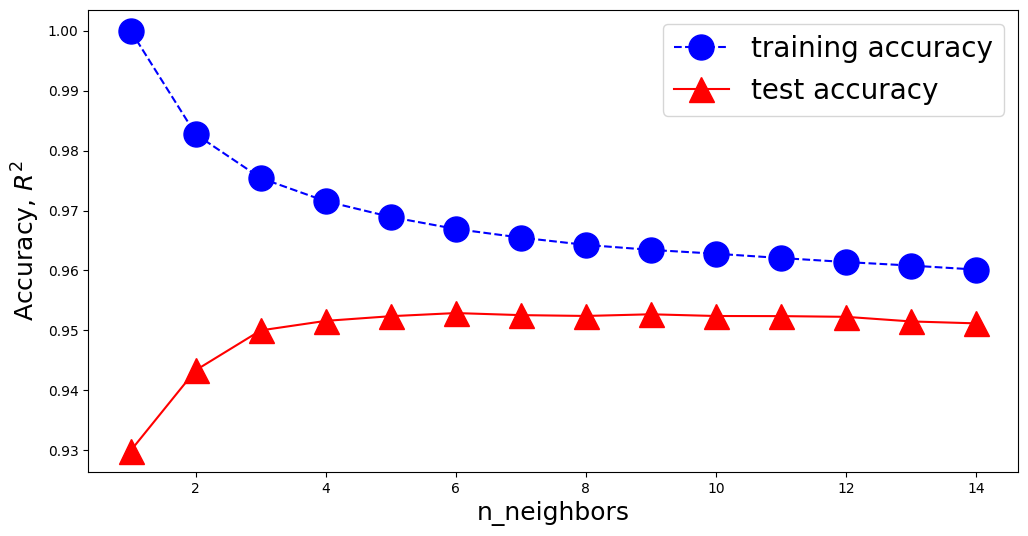

In [ ]:
fig = plt.figure(figsize=(12, 6))

import pylab as plot

params = {'legend.fontsize': 20, 'legend.handlelength': 2}
plot.rcParams.update(params)
plt.plot(neighbors_settings, training_accuracy, label="training accuracy",
         color='blue', marker='o', linestyle='dashed', markersize=18)
plt.plot(neighbors_settings, test_accuracy, label="test accuracy",
         color='red', marker='^', linestyle='-', markersize=18)
plt.ylabel("Accuracy, $R^2$", fontsize=18)
plt.xlabel("n_neighbors",fontsize=18)
plt.legend()

In [ ]:
# Create the line plot
accuracy = px.line(x=neighbors_settings, y=[training_accuracy, test_accuracy])

# Customize the layout
accuracy.update_layout(
    showlegend=True,
    hovermode="x",
    title="R Squared Score per N-Neighbor",
    legend_title="Score",
    yaxis_title="Accuracy, R²",
    xaxis_title="N-Neighbors",
    title_x=0.5
)

# Update trace settings
accuracy.update_traces(mode="markers+lines", hovertemplate=None)

# Assign labels
labels = ['Train Score', 'Test Score']
for idx, name in enumerate(labels):
    accuracy.data[idx].name = name

# Show the plot
accuracy.show()

Evaluate the model with different number of neighbors

In [ ]:
mse_scores = []
mae_scores = []
neighbors = [1, 3, 6, 10, 20]
for i in neighbors:
  regres = KNeighborsRegressor(n_neighbors=i)
  regres.fit(X_train, y_train)

  y_pred = regres.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)

  mse_scores.append(mse)
  mae_scores.append(mae)

print(mse_scores)
print(mae_scores)


[1119023.346236559, 798482.1843529848, 752298.0948214066, 760140.9206696328, 817613.6160645162]
[528.7948090470893, 476.1482635026573, 461.6594734890619, 460.0532220986281, 470.3883722654802]


Based on the model below, we can see that 6 is the ideal number of models. It has the lowest error compared to other number of neighbors.

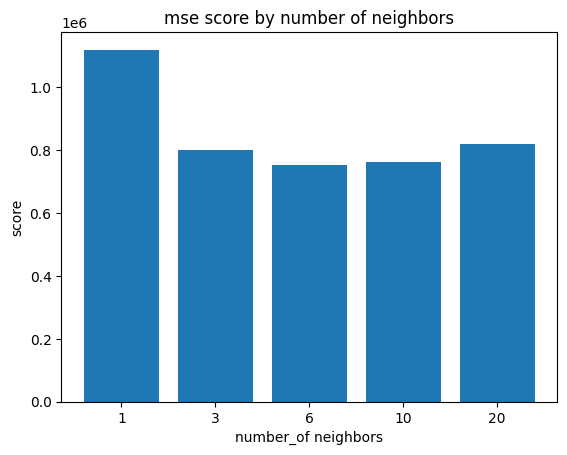

In [ ]:
plt.bar([str(i) for i in neighbors], mse_scores)
plt.xlabel('number_of neighbors')
plt.ylabel('score')
plt.title('mse score by number of neighbors')
plt.show()

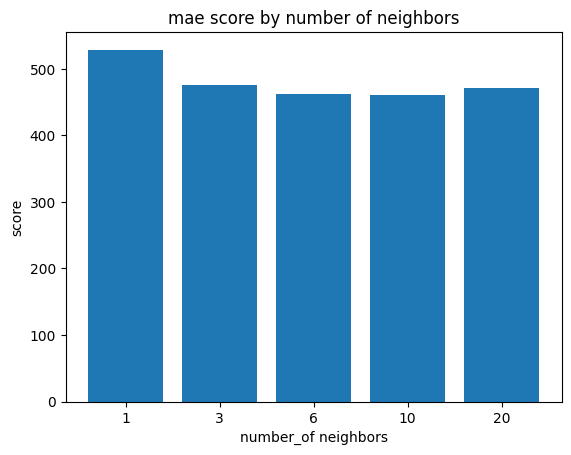

In [ ]:
plt.bar([str(i) for i in neighbors], mae_scores)
plt.xlabel('number_of neighbors')
plt.ylabel('score')
plt.title('mae score by number of neighbors')
plt.show()

Build the Model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model, set the number of neighbors to consider to 3:
reg = KNeighborsRegressor(n_neighbors=6)

# Fit the model using the training data and training targets:
reg.fit(X_train, y_train)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='uniform')

KNeighborsRegressor(n_jobs=1, n_neighbors=3)

We now have a model that has the best number of neighbors where our r squared is atleast .90 above.

In [ ]:
optimal_k = test_accuracy.index(max(test_accuracy)) + 1
optimal_score = max(test_accuracy)

print(f'Optimal Value of K is {optimal_k}')
print(f'With the R² score of {optimal_score}')

Optimal Value of K is 6
With the R² score of 0.9528973747265026


# **Discussion of Results**

**Feature Importance and Correlations:**

 - **Carat Weight:** The analysis revealed that carat weight has the strongest positive correlation with diamond price. This finding aligns with the general understanding in the diamond industry that larger diamonds are rarer and more desirable, commanding higher prices. The carat weight factor essentially captures the size and weight of the diamond, which is a crucial determinant of its value.

 - **Cut Quality:** Interestingly, the cut quality exhibited a moderate negative correlation with price. This counterintuitive observation suggests that diamonds with higher cut grades (e.g., Ideal, Premium) may have lower prices compared to those with lower cut grades (e.g., Fair, Good). One possible explanation for this could be that consumers are often willing to prioritize and pay a premium for well-cut diamonds, even if they are smaller in size or have less desirable color or clarity grades.

 - **Color and Clarity:** The color and clarity attributes also showed correlations with price, but their impact was relatively weaker compared to carat weight and cut quality. This indicates that while color and clarity are important factors in diamond pricing, they may not be as influential as the diamond's size and cut quality in determining its overall value.

**Model Performance and Optimal Configuration:**

The kNN regression model was trained and evaluated using a range of k values (number of neighbors) to determine the optimal configuration. The results showed that the optimal value of k was 6, which yielded the highest R² score of 0.95 on the test set. This high R² score suggests that the model can explain approximately 95% of the variance in diamond prices, demonstrating its effectiveness in capturing the underlying relationships between the features and the target variable.

Additionally, the Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics were used to assess the model's prediction accuracy. Both MSE and MAE decreased as k approached the optimal value of 6, indicating that the model's predictions became more accurate with the optimal number of neighbors.

**Implications and Recommendations:**


Based on the findings, several implications and recommendations can be derived:


 - **Carat Weight Consideration:** Due to its strong positive correlation with price, carat weight should be carefully considered when purchasing diamonds. Buyers should evaluate their budget and personal preferences to determine the appropriate carat weight that balances size and other quality factors.

 - **Cut Quality Prioritization:** Despite the negative correlation observed, it is recommended to prioritize diamonds with excellent or ideal cut grades. Cut quality significantly influences a diamond's brilliance, sparkle, and overall visual appeal, which are essential factors in determining its value and desirability.

 - **Color and Clarity Evaluation:** While color and clarity have a relatively weaker impact on price compared to carat weight and cut quality, it is still crucial to evaluate these attributes to ensure they meet personal standards and preferences.

 - **Utilization of the kNN Regression Model:** The developed kNN regression model can be employed as a valuable tool for individuals interested in purchasing diamonds. By inputting the relevant attributes (carat weight, cut quality, color, clarity, and physical dimensions), the model can provide reliable price estimates based on the patterns learned from the training data. This can aid in informed decision-making, negotiation, and ensuring fair pricing during diamond purchases.

 - **Continuous Model Refinement:** As the diamond market and pricing dynamics evolve over time, it is recommended to periodically update and refine the kNN regression model with new data to maintain its accuracy and relevance.
